# <center> Clasificación y Generación de Dígitos con la Base de datos MNIST <center>
    
    Nombres:
    Correo:

## 1) Ingreso de los Datos:
Training:

Test:

Ingreso de Paquetes

In [24]:
# inicialmente utilizamos los datos de keras, según digitalocean:
# https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python
# También se pueden descargar de:
# https://www.kaggle.com/datasets/hojjatk/mnist-dataset
!(pip install keras)
!(pip install scikit-learn)
!(pip install tensorflow)
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

Cargamos los datos

Convertimos a numpy para poder llamar los elementos más fácilmente

In [169]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=np.array(x_train) 
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
print('X_train: ',x_train.shape) # Indices: (Imagen i, fila j, columna k)
print('Y_train: ',y_train.shape)
print('X_test:  ',x_test.shape)
print('Y_test:  ',y_test.shape)

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


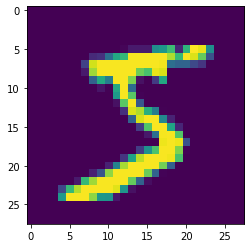

In [3]:
plt.imshow(x_train[0])

In [4]:
y_train[0]

5

## 2) Implementación del Modelo

In [5]:
dim=x_train.shape
x_train_p=x_train.reshape(dim[0],dim[1]*dim[2])
dim=x_test.shape
x_test_p=x_test.reshape(dim[0],dim[1]*dim[2])

In [6]:
nb_classifier = GaussianNB() #MultinomialNB()
nb_classifier.fit(x_train_p, y_train)

GaussianNB()

In [35]:
y_pred = nb_classifier.predict(x_test_p)

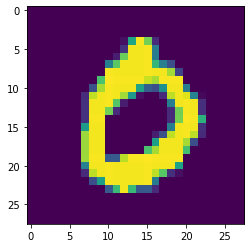

In [10]:
plt.imshow(x_test[3])

Naive Bayes Raw

Asumimos que cada pixel sigue una distribución normal. Calculamos la probabilidad para cada 

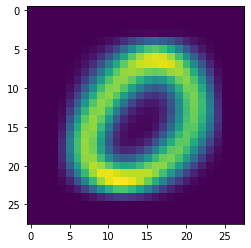

In [167]:
nums=np.unique(y_train)
av=np.zeros((len(nums),dim[1],dim[2]))
sigma=np.zeros((len(nums),dim[1],dim[2]))
for i in np.unique(y_train):
#     s+=len(x_train[y_train==i])
    av[i]=np.mean(x_train[y_train==i], axis=0) # Números promedio del training (por pixel)
    sigma[i]=np.std(x_train[y_train==i], axis=0) # desviaciones del training(por pixel) 
plt.imshow(av[0])

In [163]:
a=[[1,2],[3,4]]
a=np.concatenate((a,[[1,2],[3,4]]),axis=1)
# a=np.concatenate((a,[[1,2],[3,4]]),axis=0)
a

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [168]:
# prob=np.ones(len(x_test),len(nums)) # diez probabilidades por cada valor de testeo (una por cada número)
# # la resta de la gaussiana se hace con el x_test porque son los valores que queremos predecir
# # mientras que las medias y las sigmas las hacemos con los datos de entrenamiento
# for l in np.unique(y_train):
#     for j in range(dim[1]):
#         for k in range(dim[2]):
#             for i in range(dim[0]):
#                     s_off=sigma[l,j,k]+10000
#                     A=np.sqrt(2*np.pi*s_off**2)
#                     prob+=np.log(np.exp(-(x_test[i]-av[l])**2/(2*s_off**2))/A)

KeyboardInterrupt: 

In [183]:
# i=0;l=9
log_p=np.zeros((len(x_test),len(nums)))
for i in range(len(x_test)):
    for l in nums:
        s_off=sigma[l]+10000
        A=np.sqrt(2*np.pi*s_off**2)
        log_p[i,l]=np.sum(np.log(np.exp(-(x_test[i]-av[l])**2/(2*s_off**2))/A))

In [184]:
log_p

array([[-7944.88607971, -7943.26260974, -7945.04866182, ...,
        -7944.33070515, -7944.71127694, -7944.32652195],
       [-7944.89028968, -7943.26749979, -7945.04957749, ...,
        -7944.35534866, -7944.71674392, -7944.34370312],
       [-7944.88640522, -7943.24664799, -7945.0429811 , ...,
        -7944.33740391, -7944.70694213, -7944.32814669],
       ...,
       [-7944.89108156, -7943.26462349, -7945.04908207, ...,
        -7944.33889113, -7944.70640963, -7944.32587682],
       [-7944.88762638, -7943.26178957, -7945.05018412, ...,
        -7944.34380779, -7944.71014855, -7944.33412063],
       [-7944.88496739, -7943.27978461, -7945.05248244, ...,
        -7944.35873089, -7944.72170532, -7944.34384827]])

In [42]:
nb = naivebayes(train=x_train, train_lb=y_train, test=x_test, test_lb=y_test, smoothing=0)
nb_pred = nb[0]

/tmp/ipykernel_18005/2850782145.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  count.append(len(tr_lb[sep]))
/tmp/ipykernel_18005/2850782145.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  prior.append(len(tr_lb[sep]) / len(tr_lb))
/tmp/ipykernel_18005/2850782145.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differen

## 3) Desempeño de Generalización del Problema de Clasificación
problem generalization performance

In [36]:
print("Puntos etiquetados erróneamente de %d puntos : %d"
      % (x_test_p.shape[0], (y_test != y_pred).sum()))

Puntos etiquetados erróneamente de 10000 puntos : 4442


Resultados de Principales Métricas de Clasificación

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = pd.DataFrame.from_dict(classification_report(y_test, y_pred,output_dict=True)).transpose()
print(f"Accuracy: {accuracy}")
report

Accuracy: 0.5558


,precision,recall,f1-score,support
0,0.790191,0.887755,0.836136,980.0000
1,0.845611,0.950661,0.895064,1135.0000
2,0.904762,0.257752,0.401207,1032.0000
3,0.708835,0.349505,0.468170,1010.0000
4,0.884211,0.171079,0.286689,982.0000
5,0.550000,0.049327,0.090535,892.0000
6,0.649964,0.934238,0.766595,958.0000
7,0.877743,0.272374,0.415739,1028.0000
8,0.284211,0.665298,0.398279,974.0000
9,0.369439,0.946482,0.531441,1009.0000


Matriz de Confusión

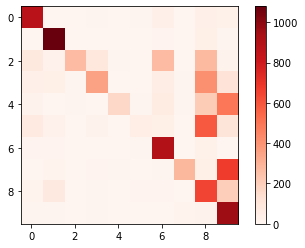

In [23]:
plt.imshow(confusion_matrix(y_test,y_pred),cmap='Reds')
plt.colorbar()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  